In [1]:
"""07_01 AdaBoost()adaptive boost."""

# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py
from __future__ import annotations

from sklearn.datasets import make_gaussian_quantiles
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_gaussian_quantiles(
    n_samples=2_000, n_features=10, n_classes=3, random_state=1
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

In [ ]:
from typing import TYPE_CHECKING

if TYPE_CHECKING:
    import numpy as np


def misclassification_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:  # noqa: D103
    return 1 - accuracy_score(y_true, y_pred)


weak_learner = DecisionTreeClassifier(max_leaf_nodes=8)
n_estimators = 300

adaboost_clf = GradientBoostingClassifier(
    estimator=weak_learner,
    n_estimators=n_estimators,
    random_state=42,
).fit(X_train, y_train)


dummy_clf = DummyClassifier()


weak_learners_misclassification_error = misclassification_error(
    y_test, weak_learner.fit(X_train, y_train).predict(X_test)
)

dummy_classifiers_misclassification_error = misclassification_error(
    y_test, dummy_clf.fit(X_train, y_train).predict(X_test)
)

print(
    "DecisionTreeClassifier's misclassification_error: "
    f"{weak_learners_misclassification_error:.3f}"
)
print(
    "DummyClassifier's misclassification_error: "
    f"{dummy_classifiers_misclassification_error:.3f}"
)
# ダミー分類器の精度より、決定木の精度の方が高い
# DecisionTreeClassifier's misclassification_error: 0.475
# DummyClassifier's misclassification_error: 0.692


DecisionTreeClassifier's misclassification_error: 0.475
DummyClassifier's misclassification_error: 0.692


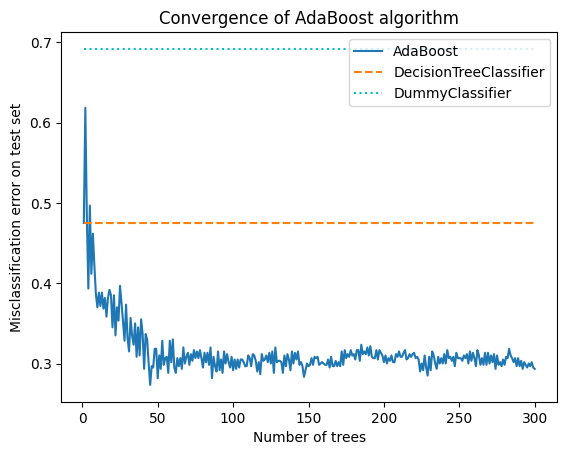

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

boosting_errors = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "AdaBoost": [
            misclassification_error(y_test, y_pred)
            for y_pred in adaboost_clf.staged_predict(X_test)
        ],
    }
).set_index("Number of trees")
ax = boosting_errors.plot()
ax.set_ylabel("Misclassification error on test set")
ax.set_title("Convergence of AdaBoost algorithm")

plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [weak_learners_misclassification_error, weak_learners_misclassification_error],
    color="tab:orange",
    linestyle="dashed",
)
plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [
        dummy_classifiers_misclassification_error,
        dummy_classifiers_misclassification_error,
    ],
    color="c",
    linestyle="dotted",
)
plt.legend(["AdaBoost", "DecisionTreeClassifier", "DummyClassifier"], loc=1)
plt.show()


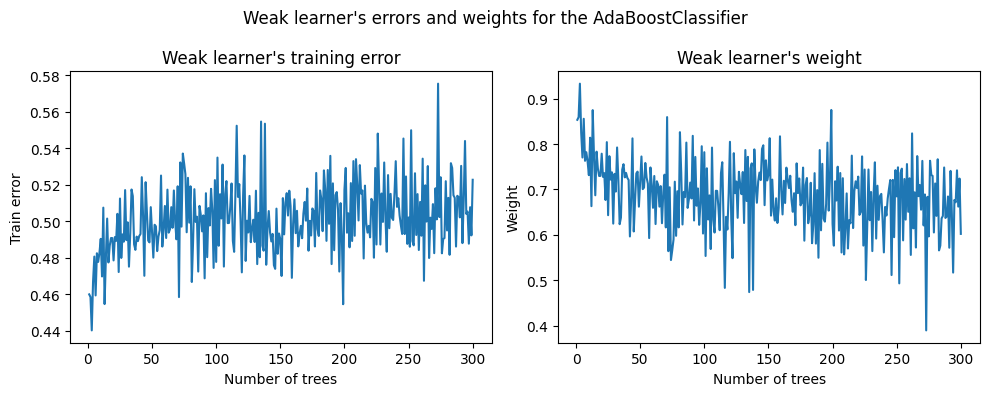

In [4]:
weak_learners_info = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "Errors": adaboost_clf.estimator_errors_,
        "Weights": adaboost_clf.estimator_weights_,
    }
).set_index("Number of trees")

axs = weak_learners_info.plot(
    subplots=True, layout=(1, 2), figsize=(10, 4), legend=False, color="tab:blue"
)
axs[0, 0].set_ylabel("Train error")
axs[0, 0].set_title("Weak learner's training error")
axs[0, 1].set_ylabel("Weight")
axs[0, 1].set_title("Weak learner's weight")
fig = axs[0, 0].get_figure()
fig.suptitle("Weak learner's errors and weights for the AdaBoostClassifier")
fig.tight_layout()